*Part 2: Python for Data Analysis I*
# Introduction to Modules, NumPy and Pandas #

## Getting help

In this class we can not cover all aspects of Python. If you want more details, you can consult, for example, the **Python Standard Library Reference** at https://docs.python.org/3/library/ or the **Language Reference** at https://docs.python.org/3/reference/. But be warned: the amount of detail in these sources can be overwhelming. For **quick and easy-to-understand overviews** of different topics see, for example, https://www.w3schools.com/python/.

For an introduction to modules, numpy and pandas, see:
*  https://www.w3schools.com/python/python_modules.asp
*  https://www.w3schools.com/python/numpy_intro.asp
*  https://www.w3schools.com/python/pandas/default.asp

If you get stuck or don't remember how to do something, it is usually a good idea to **Google** your problem. Python has a large (and fast-growing) community and you will probably find answers to most of your questions online (e.g. on **Stack Overflow** or in a **Youtube tutorial**).

## Importing modules

Up to now, we have only worked with built-in functions and data types (i.e. classes). However, there is a large number of **modules** with additional functions, classes etc. you can use (you can also easily create your own modules, see below). For example, the ``math`` module provides many useful mathematical functions:

In [226]:
import math   # import the math module with the import keyword
help(math)    # Get documentation for the math module

Help on built-in module math:

NAME
    math

DESCRIPTION
    This module provides access to the mathematical functions
    defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
        
        The result is between 0 and pi.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
        
        The result is between -pi/2 and pi/2.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
        
        The result is between -pi/2 and pi/2.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
        
        Unlike atan(y/x), the signs of both x and y are considered.
    
    atanh(x, /)
        Return the inverse hyperbolic tangent of x.
    
    ceil(x, /)
        Return the ceiling of x as an Integral.
      

Once you have imported a module, you can use its functions by specifying the name of the module, a dot, and the name of the relevant function:

In [ ]:
print(math.cos(3.5))
print(math.log(5))

-0.9364566872907963
1.6094379124341003


It may be tedious to type ``math`` every time you want to use a function from the math module (particularly for modules with longer names). Python allows you to specify a shorter name when you import a module:

In [ ]:
import math as mt

In [ ]:
print(mt.cos(3.5))
print(mt.log(5))

-0.9364566872907963
1.6094379124341003


You can also import only a specific function from the math module using the ``from`` keyword. If you do this, the function will be imported into the **global** scope and can be used directly without module prefix:

In [ ]:
from math import cos
cos(3.5)  # Now you can use the cos function directly

-0.9364566872907963

Some modules (like the math module) are part of the *Python Standard Library* and are thus always available, but **most modules need to be installed** before you can import and use them the first time (see here for a list of pre-installed modules: https://docs.python.org/3/py-modindex.html).



To install a module, you can **type ``pip install`` followed by the name of the module** in the command line (e.g. Windows Power Shell, Anaconda Prompt or console within your IDE/Editor):

In [ ]:
pip install numpy  # install the numpy module we will get to know in the next tutorial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cell_content.py:1:80: E501 line too long (110 > 79 characters)



><font color = 4e1585> SIDENOTE: If you have installed Anaconda, you can also use ``conda install`` instead of ``pip install``.

If you work with Colab, you usually don't have to do this as most modules are already installed in the cloud you are working on.

You can also write your own modules (either in Python or in C), save them on your computer and import them (or upload somethere so others can use them as well). Writing your own module in Python is as simple as writing some functions, classes or variables into a Python script and saving it under some name (in an appropriate place (see https://www.w3schools.com/python/python_modules.asp). If you want to import your module, you just type ``import`` followed by the name of your file (e.g. ``import my_module``).

Writing your own modules in python is very straightforward. To show you a minimalistic example, have a look at this .py file: <http://farys.org/daten/myhelpers.py>. It holds the function my_divide from the last tutorial as well as our own MyStr class that has a reverse method. We can now easily import this file as a module and use the defined functions, classes and methods:


In [ ]:
!wget -O myhelpers.py http://farys.org/daten/myhelpers.py # this needs to be in the right
                                                          # place, therefore we download it

# this in not needed if you work locally with an IDE.

--2023-06-27 09:11:23--  http://farys.org/daten/myhelpers.py
Resolving farys.org (farys.org)... 91.250.118.229
Connecting to farys.org (farys.org)|91.250.118.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153 [text/x-python]
Saving to: ‘myhelpers.py’

myhelpers.py        100%[===================>]     153  --.-KB/s    in 0s      

2023-06-27 09:11:23 (30.4 MB/s) - ‘myhelpers.py’ saved [153/153]



In [ ]:
import myhelpers as my

sentence = my.MyStr("Testing my own module...")
print(sentence.reverse())

# you could also import globally:
from myhelpers import my_divide
print(my_divide(8, 2))

...eludom nwo ym gnitseT
4.0


><font color = 4e1585> SIDENOTE: Apart from modules, you may also hear people talk about **packages or libraries**. You can think of them as collections of modules.

## Introduction to numpy

Imagine you want to **do data analysis or machine learning with Python**. Of course, you could write all your data into one or several **lists**. If you work with data, you have to do **element-wise operations** very often, meaning that you would always have to write a loop, a list comprehension or a function. This is not only **a lot of tedious and error-prone work**, but also **computationally inefficient** (looping through built-in data structures such as lists or dictionaries is slow because these data structures are so general).

Consider the following example where we have a dataset with the weights and heights of some people and we want to compute the BMI for each of them:

In [ ]:
# Create list with height and weight of some people
my_dataset = [["Mary", "Tim", "Rosa", "Nina"],
              ["f", "m", "f", "f"],
              [56, 73, 85, 54],
              [1.60, 1.87, 1.73, 1.50]]

my_columns = ["name", "sex", "height", "weight"]

# Add body mass index to list
bmi = [kg/(m**2) for kg, m in zip(my_dataset[2], my_dataset[3])]
my_dataset.append(bmi)
my_columns.append("bmi")

# Check result
print(my_columns)
print(my_dataset)

['name', 'sex', 'height', 'weight', 'bmi']
[['Mary', 'Tim', 'Rosa', 'Nina'], ['f', 'm', 'f', 'f'], [56, 73, 85, 54], [1.6, 1.87, 1.73, 1.5], [21.874999999999996, 20.875632703251448, 28.40054796351365, 24.0]]


This is quite some coding for something you may have to do quite often. The **numpy and pandas modules offer a much easier and more efficient** (up to 50x faster) way to do such operations. You will probaby use pandas more often, but it is still useful to start by taking a **brief look at numpy**.

Numpy (or: NumPy) stands for Numerical Python and is one of the most commonly used Python libraries. By convention, it is always imported as np:

In [ ]:
import numpy as np

The main purpose of Numpy is to provide functionality to **work with arrays**. Let's create one:

In [ ]:
my_array = np.array([1, 2, 3, 4, 5])  # Create numpy array from list

print(my_array)
type(my_array)

[1 2 3 4 5]


numpy.ndarray

But what is an array? It is very similar to a list, but it is less general and thus allows for much more efficient computation. If you are familiar with linear algebra, you can think of arrays as vectors or matrices.

In [ ]:
arr1 = np.array([2, 4, 6, 8, 10])
arr2 = np.array([5, 4, 3, 2, 1])

print(arr1*2)
print(arr1-2)
print(arr1+arr2)

[ 4  8 12 16 20]
[0 2 4 6 8]
[ 7  8  9 10 11]


Other than lists, arrays can only contain **elements of the same type**:

In [ ]:
my_list = ["a", 1, True, 3.25]
arr3 = np.array(my_list)
print(arr3)  # all elements were converted to strings!

['a' '1' 'True' '3.25']


><font color = 4e1585> SIDENOTE: To be precise, the data type in this case is ``U4``, a 4-character unicode string.
>
>```
 print(arr3.dtype)
```
>
><font color = 4e1585>If you are interested in data types in numpy, see here: https://numpy.org/doc/stable/reference/arrays.dtypes.html



Many of the things you can do with lists also work with arrays. For example, you can do **indexing and slicing** in the usual way (the returned result is still an array, not a list):

In [ ]:
print(arr1[0])      # Get first element
print(arr1[-1])     # get last element
print(arr1[1:4])    # get first second to forth element
print(arr1[:3])     # get first three elements

2
10
[4 6 8]
[2 4 6]


A convenient feature is that you can **filter arrays** using booleans:

In [ ]:
arr1[[False, False, True, True, True]]

array([ 6,  8, 10])

This is often very useful because it allows you to **select values based on a condition**:

In [ ]:
# Filter values that are greater than 3
my_filter = arr1 > 5
print(my_filter)
print(arr1[my_filter])

# Or simply:
print(arr1[arr1 > 5])

[False False  True  True  True]
[ 6  8 10]
[ 6  8 10]


The arrays we have seen so far were one-dimensional. You can also create **multidimensional arrays**:

In [ ]:
array_2D = np.array([[1, 2, 3],
                     [4, 5, 6]])
array_3D = np.array([[[0, 0, 0, 0], [1, 1, 1, 1]],
                     [[2, 2, 2, 2], [3, 3, 3, 3]]])
print("2-D array:")
print(array_2D)
print("3-D array:")
print(array_3D)

2-D array:
[[1 2 3]
 [4 5 6]]
3-D array:
[[[0 0 0 0]
  [1 1 1 1]]

 [[2 2 2 2]
  [3 3 3 3]]]


You can look the **shape of an array** using the ``shape`` attribute:

In [ ]:
print(array_2D.shape)  # shape is an attribute, not a method (so you don't use parantheses)
print(array_3D.shape)

(2, 3)
(2, 2, 4)


The length of the tuple that is returned correponds to the number of dimensions of the array, while the values (e.g. 2, 2, and 4 for the second example) indicate the number of elements in each dimension (from outermost to innermost: the array has two top level elements, that each contain two lower level elements, that each contain 4 elements).

You can change the shape of an array using the ``reshape()`` method:

In [ ]:
array_2D.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

There is much more you can do with arrays. You can join and split them, iterate through them, search them etc. If you are interested, you will find many great tutorials online. For example: https://www.w3schools.com/python/numpy_intro.asp

---

>  <font color='teal'> **In-class exercise**:
Import numpy and create a one-dimensional array with the numbers from 0 to 5 (i.e. 0, 1, 2, 3, 4, 5).


> <font color='teal'> Print (a) the last element in the array and (b) all elements that are greater than 3.

> <font color='teal'> Can you reshape your array to get the following array?
>```
array([[0, 1, 2],
       [3, 4, 5]])
```



Generally speaking, **Numpy** is a good choice when you have tasks that deal with homogeneous vectors, matrices and more-dimensional objects, e.g.:

In [ ]:
from skimage import io
photo = io.imread('http://farys.org/daten/cat_photo.jpg')
type(photo)  # this is simply a numpy.ndarray

numpy.ndarray

In [ ]:
photo.shape

(691, 1024, 3)

In [ ]:
photo[0, 0:10, 0:4]

array([[97, 85, 63],
       [98, 86, 64],
       [98, 86, 64],
       [97, 85, 63],
       [96, 84, 62],
       [94, 82, 60],
       [92, 80, 58],
       [90, 78, 56],
       [85, 74, 54],
       [86, 75, 55]], dtype=uint8)

As you can see, there is information on each pixel for each of the three basic colors.

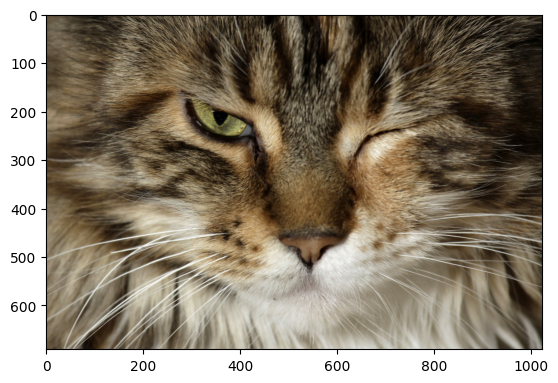

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(photo)

As this is a homogeneous array of pure numbers, it is straightforward to do some operations on the image:

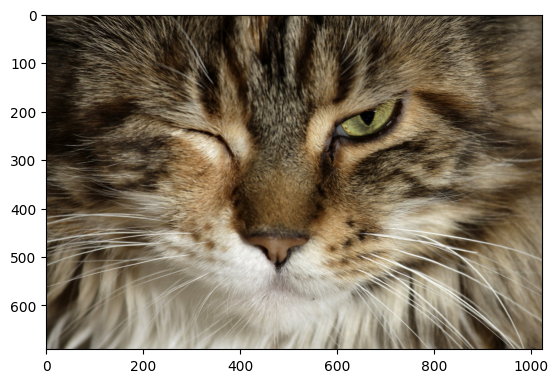

In [ ]:
plt.imshow(photo[:, ::-1])  # flipping the column-dimension -> mirror image

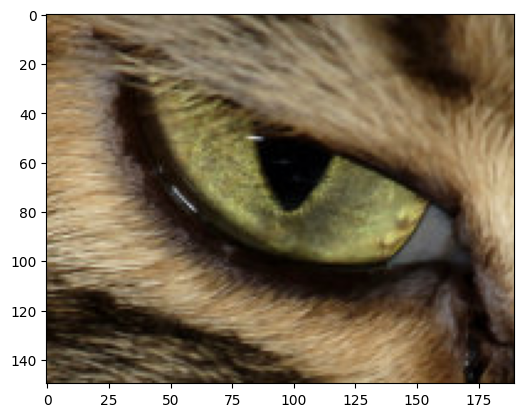

In [ ]:
plt.imshow(photo[150:300, 260:450])  # crop image

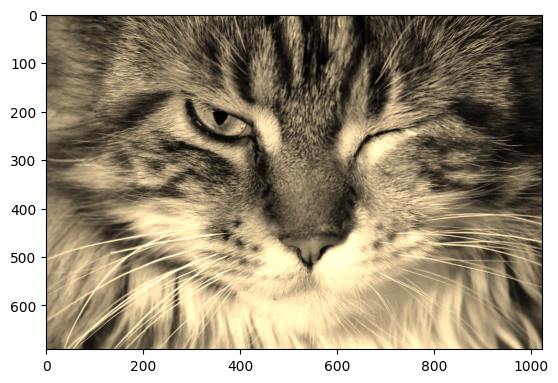

In [ ]:
def apply_sepia_filter(img_array):
    # Define the values of the sepia filter
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])

    # Apply the sepia filter to the image array
    sepia_image = np.dot(img_array, sepia_filter.T)

    # Clip the values to make sure they are in the range [0, 255]
    sepia_image = np.clip(sepia_image, 0, 255)

    # Convert the image back to uint8 data type
    sepia_image = sepia_image.astype(np.uint8)

    # Return the sepia image array
    return sepia_image


vintage_cat = apply_sepia_filter(photo)
plt.imshow(vintage_cat)

You can have a look at more simple examples here: https://scikit-image.org/docs/stable/auto_examples/

---

>  <font color='teal'> **In-class exercise**:
Can you compress the image by a factor of 100 by just using every 10th row and every 10th column?</font>


  ---

>  <font color='teal'> Can you swap the values for red and blue in the photo?

> <font color='violet'> Hint: </font><font color='white'>You could flip/invert the order of the third dimension of the array which holds the RGB-values. Inverting the order (RGB -> BGR) will effectively take the blue-value for red and the red-value for blue.

## Introduction to pandas

**Numpy** is fast and makes numerical computations much easier, but it lacks some of the functionality we would like to have when we work with statistical data. For example, we **cannot give labels to the rows and columns** (e.g. "variable names" in statistics) and we **cannot have different data types in the same array** (i.e. an array cannot hold a "string variable" and a "numeric variable" at the same time). This means that we have to use the numeric indices to access parts of the dataset and may need to do tedious type conversions (or save different parts of the data in different arrays) if want to do computations:

In [ ]:
# Create dataset as numpy array
my_dataset = np.array([["Mary", "Tim", "Rosa", "Nina"],
                       ["f", "m", "f", "f"],
                       [56, 73, 85, 54],
                       [1.60, 1.87, 1.73, 1.50]])
print(my_dataset.dtype)  # array of strings was created

# Add BMI to array
bmi = my_dataset[2].astype(np.float64)/(my_dataset[3].astype(np.float64))**2
my_dataset = np.append(my_dataset, bmi).reshape(5, 4)
my_dataset.shape

<U32


(5, 4)

**Pandas builds on top of numpy and introduces these functionalities!** So let's get started with it.

By convention, pandas is always **imported as pd**:

In [ ]:
import pandas as pd


 We will begin with the **basic object types** in pandas: **pandas series** and **pandas dataframes**.

###Pandas series

Pandas **series are very similar to one-dimensional numpy array**. You can think of them as a column in a data frame (a statistical variable). Let's create one:

In [ ]:
weight_list = [56, 73, 85, 54]
weight = pd.Series(weight_list)  # Or directly: pd.Series([56, 73, 85, 54])
weight

0    56
1    73
2    85
3    54
dtype: int64

There is one key difference to numpy arrays: Pandas series also have **labels** that you can customize. This can be done using the **index parameter** (i.e. by providing a list of labels as arguments):  

In [ ]:
weight = pd.Series(weight_list,
                   index=["Mary", "Tim", "Rose", "Nina"])  # index parameter
                                                           # takes a list as argument!
weight

Mary    56
Tim     73
Rose    85
Nina    54
dtype: int64

Now you can also access values using the labels you specified:

In [ ]:
print(weight["Tim"])  # Access through labels
print(weight[1])      # Access through positional index works too

73
73


A (labeled) pandas series can also be built from a dictionary

In [ ]:
weight_dict = {"Mary": 56, "Tim": 73, "Rose": 85, "Nina": 54}
weight = pd.Series(weight_dict)
weight

Mary    56
Tim     73
Rose    85
Nina    54
dtype: int64

><font color = 4e1585> SIDENOTE: We said that pandas series are very similar to (one-dimensional) numpy arrays, but that they additionally have indices/labels. In fact, the values in a pandas series are a numpy array! If you exectute ``type(weight.values)`` (where ``weight`` is a pandas series) you will get ``numpy.ndarray`` as the output. Hence, you can think of pandas series as an object that combines a numpy array with indices/labels.

As you may have guessed, you can directly perform element-wise operations with pandas series:

In [ ]:
weight = pd.Series([56, 73, 85, 54],
                   index=["Mary", "Tim", "Rose", "Nina"])

height = pd.Series([1.60, 1.87, 1.73, 1.50],
                   index=["Mary", "Tim", "Rose", "Nina"])

BMI = weight/height**2
BMI

Mary    21.875000
Tim     20.875633
Rose    28.400548
Nina    24.000000
dtype: float64

This is already much more convenient than using lists or numpy arrays. However, it usually does not make sense to have each column as a different object. This is where dataframes come in.

### Pandas dataframe

Dataframes are **(two-dimensional) tables of data** (similar to an Excel spreadsheet or a data table in Stata or SPSS). Let's create one:

In [ ]:
# Create dataframe from dictionary
my_dict = {"sex":    ["f", "m", "f", "f"],
           "weight": [56, 73, 85, 54],
           "height": [1.60, 1.87, 1.73, 1.50]}
df = pd.DataFrame(my_dict,
                  index=["Mary", "Tim", "Rose", "Nina"])
df

,sex,weight,height
Mary,f,56,1.60
Tim,m,73,1.87
Rose,f,85,1.73
Nina,f,54,1.50


A pandas dataframe consists of three components (called *attributes*):


*   **Values**: The data within the table (called *values*)
*   **Row indices**: Labels you can specify for each row (called *index*)
*   **Column indices**: Labels you can specify for each column (called *column*)

Let's have a look at each of these attributes of the dataframe object:



In [ ]:
print(df.values)
print(df.index)
print(df.columns)

[['f' 56 1.6]
 ['m' 73 1.87]
 ['f' 85 1.73]
 ['f' 54 1.5]]
Index(['Mary', 'Tim', 'Rose', 'Nina'], dtype='object')
Index(['sex', 'weight', 'height'], dtype='object')


We have already seen the ``index`` parameter to specify the row labels. Analogously, we can use the ``columns`` parameter to specify the column labels (i.e. "variable names"):

In [ ]:
# Create dataframe from a nested list
df2 = pd.DataFrame([["f", 56, 1.60],
                    ["m", 73, 1.87],
                    ["f", 85, 1.73],
                    ["m", 54, 1.50]],
                   index=["Mary", "Tim", "Rose", "Nina"],
                   columns=["sex", "weight", "height"])
df2

,sex,weight,height
Mary,f,56,1.60
Tim,m,73,1.87
Rose,f,85,1.73
Nina,m,54,1.50


><font color = 4e1585> SIDENOTE: Usually, you will not create dataframes manually, but you will import them from some file. We will see how to do this next time.

You can also **change the labels** of an existing dataframe:

In [ ]:
# Change labels
df2.index = ["obs1", "obs2", "obs3", "obs4"]
df2.columns = ["var1", "var2", "var3"]
df2

,var1,var2,var3
obs1,f,56,1.60
obs2,m,73,1.87
obs3,f,85,1.73
obs4,m,54,1.50


Another way to create a dataframe would be zipping lists:

In [ ]:
names = ["Mary", "Tim", "Rose", "Nina"]
sex = ["f", "m", "f", "m"]
weight = [56, 73, 85, 54]
height = [1.60, 1.87, 1.73, 1.50]
df3 = pd.DataFrame(zip(sex, weight, height),
                   columns=["sex", "weight", "height"],
                   index=names)

df3

,sex,weight,height
Mary,f,56,1.60
Tim,m,73,1.87
Rose,f,85,1.73
Nina,m,54,1.50


#### Accessing and adding columns

You can **access a column** in a dataframe using the column label:

In [ ]:
df["height"]

Mary    1.60
Tim     1.87
Rose    1.73
Nina    1.50
Name: height, dtype: float64

In [ ]:
type(df["height"])  # selecting a column returns a pandas Series!

pandas.core.series.Series

Columns can also be accessed as attributes (if they have names without spaces or other special characters):

In [ ]:
df.height

Mary    1.60
Tim     1.87
Rose    1.73
Nina    1.50
Name: height, dtype: float64

If you enter a list of columns labels into the indexer (i.e. the ``[]``), you can also **access several columns** at once:

In [ ]:
df[["height", "weight"]]  # Don't forget that you need to use
                          # double square brackets: [[]]

,height,weight
Mary,1.60,56
Tim,1.87,73
Rose,1.73,85
Nina,1.50,54


**Adding an additional column** is also straightforward. Let's add the BMI column:

In [ ]:
df["bmi"] = df["weight"]/df["height"]**2
df

,sex,weight,height,bmi
Mary,f,56,1.60,21.875000
Tim,m,73,1.87,20.875633
Rose,f,85,1.73,28.400548
Nina,f,54,1.50,24.000000


You could also add new columns manually (but note that the specified list must have the correct length):

In [ ]:
df["age"] = [42, 60, 92, 13]
df

,sex,weight,height,bmi,age
Mary,f,56,1.60,21.875000,42
Tim,m,73,1.87,20.875633,60
Rose,f,85,1.73,28.400548,92
Nina,f,54,1.50,24.000000,13


---

>  <font color='teal'> **In-class exercise**:
Import pandas and create the following dataframe (earnings are per month, workhours per week) and assign it to the variable ``my_df``:
>
>|  | earnings | workhours |
>| :- | -: | :-: |
>| Max | 4050 | 45
>| Nina | 6000| 30
>| Sarah | 2400 | 30
>
>  
<font color='teal'>(You can copy the values from here so you do not have to type everything: names: Max, Nina, Sarah; earnings: 4500, 6000, 2400; workhours: 45, 30, 30)
>


In [ ]:
# Create dataframe from dictionary


>  <font color='teal'> Add an additional column ``wage`` with the hourly wage for each person. Print this column.

---

#### Subsetting data

We have seen how to access columns. But often you want to do more complicated things, such as accessing rows, accessing combinations of rows and columns, or accessing slices of rows or columns.

Appart from the ``[]`` indexer that allows you to access columns (or slices of rows -- but never mind), pandas provides also **two more sophisticated indexers for dataframes: the ``loc[]`` and the ``iloc[]`` indexer**.


##### **Subsetting with the ``loc[]`` indexer**


The ``loc[]`` indexer allows you to access (**loc**ate) data **based on the labels**:

In [ ]:
df

,sex,weight,height,bmi,age
Mary,f,56,1.60,21.875000,42
Tim,m,73,1.87,20.875633,60
Rose,f,85,1.73,28.400548,92
Nina,f,54,1.50,24.000000,13


In [ ]:
df.loc["Rose", "height"]

1.73

The syntax works as follows:
*   *dataframe*``.loc[``*rows*``,`` *columns*``]``

This is, you write ``.loc[]`` after your dataframe and, within the brackets,   first specify the rows and then (after the comma) the columns.

Appart from selecting **single labels** (as in the example above), you can also select multiple rows and/or columns. One way to do this is by providing a **list of labels**:





In [ ]:
df.loc[["Rose", "Mary", "Nina"], ["height", "weight"]]

,height,weight
Rose,1.73,85
Mary,1.60,56
Nina,1.50,54


The second way to select several rows or columns is through **slicing**:

In [ ]:
df.loc["Tim":"Nina", "sex":"height"]

,sex,weight,height
Tim,m,73,1.87
Rose,f,85,1.73
Nina,f,54,1.50


You already know slicing from lists and strings. The things we have seen there work with pandas dataframes as well:

In [ ]:
# leave end of slice empty (to go to the end)
print(df.loc["Tim":, "sex":"height"])

# leave beginning of slice empty (to start from the beginning)
print(df.loc["Tim":"Nina", :"height"])

# leave beginning and end empty (to take the entire sequence)
print(df.loc["Tim":"Nina", :])   # Or just: df.loc["Tim":"Nina"]

     sex  weight  height
Tim    m      73    1.87
Rose   f      85    1.73
Nina   f      54    1.50
     sex  weight  height
Tim    m      73    1.87
Rose   f      85    1.73
Nina   f      54    1.50
     sex  weight  height        bmi  age
Tim    m      73    1.87  20.875633   60
Rose   f      85    1.73  28.400548   92
Nina   f      54    1.50  24.000000   13


<font color = red> As you may have noticed, there is **one key difference**. When we do slicing with lists or strings, the end of the slice is not included. This is different with the ``loc[]`` indexer, where the **end of the slice (i.e. "height" or "Nina") is always included**!

You can also combine the different types of subsetting (single labels, list of labels, slices with labels):

In [ ]:
df.loc[["Tim", "Nina"], "sex":"height"]

,sex,weight,height
Tim,m,73,1.87
Nina,f,54,1.50


As you may have guessed, you cannot only use this syntax to extract parts of your data, buy also to modify your dataframe:

In [ ]:
# Modify one value
df.loc["Tim", "weight"] = 85
print(df)

# Modify several values
df.loc[["Tim", "Nina"], "height"] = [1.85, 1.58]
print(df)

df["bmi"] = df["weight"]/df["height"]**2  # Correct body mass index

     sex  weight  height        bmi  age
Mary   f      56    1.60  21.875000   42
Tim    m      85    1.85  24.835646   60
Rose   f      85    1.73  28.400548   92
Nina   f      54    1.58  21.631149   13
     sex  weight  height        bmi  age
Mary   f      56    1.60  21.875000   42
Tim    m      85    1.85  24.835646   60
Rose   f      85    1.73  28.400548   92
Nina   f      54    1.58  21.631149   13


##### **Subsetting with the ``iloc[]`` indexer**

You can not only select data based on the labels, but also **based on the positional index of the columns or rows**. This is done with the ``iloc[]`` indexer (**i**nteger **loc**ation):

In [ ]:
print(df)
print(df.iloc[1, 2])

     sex  weight  height        bmi  age
Mary   f      56    1.60  21.875000   42
Tim    m      85    1.85  24.835646   60
Rose   f      85    1.73  28.400548   92
Nina   f      54    1.58  21.631149   13
1.85


The syntax is as follows:
*   *dataframe*``.iloc[``*rows*``,`` *columns*``]``

It works just as the ``loc[]`` indexer, but you have to provide the numeric index rather than the label to define the rows and columns you want to select. As usual in Python, counting starts with 0.  

As with ``loc[]`` indexer, you can provide **single indices, a list of indices or slices of indices** as arguments to the indexer:

In [ ]:
print(df.iloc[2, 2])              # single indices
print(df.iloc[[1, 3], [0, 2, 3]])  # lists of indices
print(df.iloc[:2, 1:3])           # slices of indices

1.73
     sex  height        bmi
Tim    m    1.85  24.835646
Nina   f    1.58  21.631149
      weight  height
Mary      56    1.60
Tim       85    1.85


<font color = red> Did you notice something in the slicing example? With the ``iloc[]`` indexer, the **end of the slice is not included**! This means that in this respect, slicing with ``iloc[]`` works like list or string slicing and not like ``loc[]`` slicing!

##### **Boolean indexing**

You can also select data based on true/false conditions. This is called **Boolean indexing**. We have already seen it for numpy arrays. It works with pandas dataframes as well:

In [ ]:
df

,sex,weight,height,bmi,age
Mary,f,56,1.60,21.875000,42
Tim,m,85,1.85,24.835646,60
Rose,f,85,1.73,28.400548,92
Nina,f,54,1.58,21.631149,13


In [ ]:
print(df[df["age"] > 17])  # Note that df["age" > 17] would not work!!
print(df[df["sex"] == "f"])
print(df[df["age"].isin([20, 40, 60, 80, 100])])  # isin() checks whether age is
                                                  # equal to any of the provided values

     sex  weight  height        bmi  age
Mary   f      56    1.60  21.875000   42
Tim    m      85    1.85  24.835646   60
Rose   f      85    1.73  28.400548   92
     sex  weight  height        bmi  age
Mary   f      56    1.60  21.875000   42
Rose   f      85    1.73  28.400548   92
Nina   f      54    1.58  21.631149   13
    sex  weight  height        bmi  age
Tim   m      85    1.85  24.835646   60


In each of these cases, all **rows for which the condition is true** were selected.

 You can also specify multiple conditions:

In [ ]:
df[(df["bmi"] <= 18.5) | (df["bmi"] >= 25)]  # or operator: |
df[(df["age"] > 17) & (df["sex"] == "f")]    # and operator: &

,sex,weight,height,bmi,age
Mary,f,56,1.60,21.875000,42
Rose,f,85,1.73,28.400548,92


Boolean indexing also works with the ``loc[]`` indexer. This is how you would typically access a selection of variables for a subset of your observations:

In [ ]:
df.loc[df["age"] > 17, ["age", "weight", "height"]]

,age,weight,height
Mary,42,56,1.60
Tim,60,85,1.85
Rose,92,85,1.73


If you want to learn more about subsetting, see for example: https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

><font color = 4e1585> SIDENOTE: Above we used code such as ``df["name2"]`` or ``df[["name1","name2",...]]`` to select columns of the dataframe (see "Accessing and adding columns"). However, when we do Boolean indexing, rows rather than columns were selected. How does Python know that we want to select rows when we use Boolean indexing, i.e. when we type something like ``df[df["age"] > 17]``? Pandas tries to be smart and decides depending on type of input whether to select columns of rows. If the input is strings, then columns are selected; if the input is booleans, then rows are selected.



---


>  <font color='teal'> **In-class exercise**:
Consider the following dataframe:

In [ ]:
labor_df = pd.DataFrame({"income":    [4500, 6000, 2400, 4500, 5000],
                         "workhours": [45, 30, 30, 25, 50],
                         "sex":       ["m", "f", "f", "m", "f"],
                         "age":       [24, 57, 36, 46, 19]},
                        index=["Max", "Nina", "Sarah", "Paul", "Kate"])

labor_df

,income,workhours,sex,age
Max,4500,45,m,24
Nina,6000,30,f,57
Sarah,2400,30,f,36
Paul,4500,25,m,46
Kate,5000,50,f,19


>  <font color='teal'> Print Sarah's age using the ``iloc[]``  indexer:


In [ ]:
labor_df.iloc[2, 3]

36

>  <font color='teal'> Print the income and age for all persons from Nina to Paul using the ``loc[]`` indexer.

In [ ]:
labor_df.loc["Nina":"Paul", ["income", "age"]]

,income,age
Nina,6000,57
Sarah,2400,36
Paul,4500,46


>  <font color='teal'> Now print the data for all women in the dataset.

In [ ]:
labor_df.loc[labor_df["sex"] == "f", :]

,income,workhours,sex,age
Nina,6000,30,f,57
Sarah,2400,30,f,36
Kate,5000,50,f,19




---



### Views and copies in pandas*

Just like lists, dicionaries and sets, arrays and dafaframes (or series) are mutable (see first tutorial). This means that they exhibit the same confusing behavior under certain conditions:

In [ ]:
array1 = np.array([1, 2, 3])
array2 = array1
array1[0] = 3

print(array1)
print(array2)

[3 2 3]
[3 2 3]


In [ ]:
data1 = pd.DataFrame({"var1": [1, 2],
                      "var2": [3, 4]})
data2 = data1
data1.loc[1] = 0

print(data1)
print(data2)

   var1  var2
0     1     3
1     0     0
   var1  var2
0     1     3
1     0     0


As you may have guessed, this happens because array1 and array2, as well as data1 and data2, are **different pointers to the same object**.

A similar behavior ocurrs if you **assign a slice of your dataframe to a variable**:

In [ ]:
df = pd.DataFrame({"col1": [1, 2],
                   "col2": [3, 4],
                   "col3": [5, 6]})
col1 = df.loc[:, "col1"]  # Assign first column to variable col1
col1[0] = 10000           # Change first value in col1
print(col1)
df                        # Value is changed in df too!

0    10000
1        2
Name: col1, dtype: int64


,col1,col2,col3
0,10000,3,5
1,2,4,6


Depending on the context, pandas will either create a **copy** (new object) or a **view** (pointer to a part of the existing object) when we assign parts of our data to a new variable.

![Client Server Model](https://www.dataquest.io/wp-content/uploads/2019/01/view-vs-copy.png)



In the code above, only a view was created.  As ``col1`` is no new object but just a pointer to a slice of ``df``, changing it will change ``df`` too (and vice versa).



 If you want to make true copies of an array, a dataframe or a part of your dataframe, you can **use the copy method** that exists both for numpy arrays and for pandas dataframes (or series):

In [ ]:
array1 = np.array([1, 2, 3])
array2 = array1.copy()
array1[0] = 3

print(array1)
print(array2)

[3 2 3]
[1 2 3]


In [ ]:
data1 = pd.DataFrame({"var1": [1, 2],
                      "var2": [3, 4]})
data2 = data1.copy()
data1.loc[1] = 0

print(data1)
print(data2)

   var1  var2
0     1     3
1     0     0
   var1  var2
0     1     3
1     2     4


In [ ]:
df = pd.DataFrame({"col1": [1, 2],
                   "col2": [3, 4],
                   "col3": [5, 6]})
col1 = df.loc[:, "col1"].copy()
col1[0] = 10000
print(col1)
df

0    10000
1        2
Name: col1, dtype: int64


,col1,col2,col3
0,1,3,5
1,2,4,6


><font color = 4e1585> SIDENOTE: Sometimes you will come across the following warning:
>
>```
SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead
````
>
><font color = 4e1585>This appears when pandas thinks that we might not be aware that we are dealing with a copy rather than a slice. This can not only happen when you assign a part of your dataframe to a variable, but, more generally, when you perform chained operations. In most cases, you will still get the output you expect, but sometimes you won't:


In [ ]:
df[df["col1"] == 1]["col2"] = 1000
df  # df is NOT changed

<ipython-input-221-86004baab40a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["col1"] == 1]["col2"] = 1000


,col1,col2,col3
0,1,3,5
1,2,4,6


><font color = 4e1585> As a rule of thumb, it is better to use the ``iloc[]`` or the ``loc[]`` indexer rather than the simple ``[]`` indexer (they avoid chaining):

In [ ]:
df.loc[df["col1"] == 1, "col2"] = 5000
df  # df is changed

,col1,col2,col3
0,1,5000,5
1,2,4,6


><font color = 4e1585> To be honest, the implementation of views and copies in pandas and the respective warnings is not very transparent and quite confusing. If you want to learn more about them, see, for example:


- https://www.dataquest.io/blog/settingwithcopywarning/

## Next week

In the next session we will deal with pandas in more detail. If you already want to prepare a little, the following videos are recommended:
* https://youtu.be/vmEHCJofslg (1:08 h)
* https://youtu.be/ZyhVh-qRZPA (Part 3 - 11, very extensive!)
* ...or countless other videos on YouTube

If you prefer to learn with text rather than videos, this online tutorial (with exercises) is highly recommended:
* https://www.kaggle.com/learn/pandas